In [1]:

from matplotlib import pyplot as plt
import os
import numpy as np
import glob
import os

## astropy
import astropy.units as u
from astropy.table import Table

## calin
from cta.nectarcam.feb.I_NmcConfig import NmcConfig

## ctapipe
from ctapipe_io_nectarcam import NectarCAMEventSource 
from ctapipe.io import event_source, EventSeeker

import scipy.stats as scsp
from scipy.stats import poisson                                                                                                             

from fit_ses_v6 import *
#import seaborn as sns



/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))


In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
npix = 40
nloop = 5
ress_MC    = []
ress_data  = []
gains_MC   = []
gains_data = []

sim_gains    = []
sim_gains2   = []
sim_gains3   = []

#MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_08pe_newWF.simtel.gz'
#MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_08pe_WF1010_noise36_TTled.simtel.gz'
#MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_06pe_WF1010_noise36_TTled_40k.simtel.gz'
#MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_06pe_WF1010_noise36_TTled_SPE1812_NG.simtel.gz'
MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/test_ff_06pe_NG_shift-30_nogain_qe_variaion.simtel.gz'

#data_file_path = '/media/ttaverni/Transcend/data/speR1/NectarCAM.Run1043.000[0-9].fits.fz'
data_file_path = "/media/ttaverni/Transcend/data/speR1/NectarCAM.Run1482.0000.fits.fz"
    

In [4]:

        

for jj in range(nloop):
    wfs_MC   = []
    wfs_data = []
    pixs = np.arange(jj*npix,(jj+1)*npix,1)
    inputfile_reader_MC = event_source(
            input_url = MC_file_path,
            max_events=40000)

    all_wfs = []
    for ii, event in enumerate(inputfile_reader_MC):
            all_wfs.append(event.r0.tel[1].waveform[0,pixs])
            if ii%10000==0:
                print(ii)
    wfs_MC = np.array(all_wfs)
    
    dc_to_pe = event.mc.tel[1].dc_to_pe[0,pixs]
    
    Simgains    = 1./(event.mc.tel[1].reference_pulse_shape[1,::10].sum()*19.55* dc_to_pe)*58
    Simgains2   = 1./(event.mc.tel[1].reference_pulse_shape[1,(30 - 6)*10:(30 + 10)*10:10].sum()*19.56* dc_to_pe)
    
    inputfile_reader = NectarCAMEventSource(
            input_url = data_file_path,
            max_events=40000)
    cfg = inputfile_reader.camera_config
    pix_ids = cfg.expected_pixels_id[pixs]    
    all_wfs = []
    for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[event.r0.tels_with_data[0]].waveform[1,pix_ids])
    wfs_data = np.array(all_wfs)
        
    for pix_index in range(npix):
        wfs = wfs_MC[:,pix_index]
        Smax = wfs.mean(axis=0).argmax()
        Q_array1_MC = wfs[:,Smax-6:Smax+10].sum(axis=1)
        try:
            res_MC,err,gain_MC = fit_ses_2g(Q_array1_MC,plot=False)
        except:
            continue
    
        wfs = wfs_data[:,pix_index]
        Smax = wfs.mean(axis=0).argmax()
        Q_array1_data = wfs[:,Smax-6:Smax+10].sum(axis=1)
        try:
            res_data,err,gain_data = fit_ses_2g(Q_array1_data,plot=False)
        except:
            continue
        if gain_data<50 or res_MC[0]<.55:
            continue
        
        ress_MC.append(res_MC)
        ress_data.append(res_data)
        gains_MC.append(gain_MC)
        gains_data.append(gain_data)
        sim_gains.append(Simgains[pix_index])
        sim_gains2.append(Simgains2[pix_index])


0
10000
20000
30000
=== Gain ::  58.58297284883837 p.e. ------------- ==== Light I 0.6061611585180111
=== Gain ::  58.93934346049791 p.e. ------------- ==== Light I 0.6397217629646226
=== Gain ::  56.618842281113864 p.e. ------------- ==== Light I 0.6035525896687999
=== Gain ::  58.6702717043223 p.e. ------------- ==== Light I 0.6672363095947667
=== Gain ::  57.17962253822897 p.e. ------------- ==== Light I 0.6073227571366787
=== Gain ::  58.43038936518642 p.e. ------------- ==== Light I 0.6467088301721248
=== Gain ::  56.38385206492275 p.e. ------------- ==== Light I 0.6004892838219422
=== Gain ::  59.703374466943195 p.e. ------------- ==== Light I 0.651306316330554
=== Gain ::  57.04209382536785 p.e. ------------- ==== Light I 0.5987273619011931
=== Gain ::  58.59215618247932 p.e. ------------- ==== Light I 0.621260565819197
=== Gain ::  57.88844597574541 p.e. ------------- ==== Light I 0.6120708697351421
=== Gain ::  57.497465022393634 p.e. ------------- ==== Light I 0.6430962281951

=== Gain ::  55.668368663073956 p.e. ------------- ==== Light I 0.6072544607371594
=== Gain ::  55.427277006927135 p.e. ------------- ==== Light I 0.636507990998112
=== Gain ::  58.9558786227695 p.e. ------------- ==== Light I 0.6134403329578028
=== Gain ::  58.471154581324804 p.e. ------------- ==== Light I 0.6653022486489362
=== Gain ::  58.50951610092281 p.e. ------------- ==== Light I 0.613039125577148
=== Gain ::  58.804499065543695 p.e. ------------- ==== Light I 0.677628515743917
=== Gain ::  58.95494576750836 p.e. ------------- ==== Light I 0.5975285775669773
=== Gain ::  57.43864598354218 p.e. ------------- ==== Light I 0.6095252615868586
=== Gain ::  56.14150804856789 p.e. ------------- ==== Light I 0.6012385281056322
=== Gain ::  60.966097834193 p.e. ------------- ==== Light I 0.6270344433670201
=== Gain ::  56.92480354361583 p.e. ------------- ==== Light I 0.6077086784823768
=== Gain ::  58.09893751999229 p.e. ------------- ==== Light I 0.632566176128298
=== Gain ::  58.520

=== Gain ::  57.786203124235065 p.e. ------------- ==== Light I 0.602401985391467
=== Gain ::  57.6075899393661 p.e. ------------- ==== Light I 0.657803165548452
=== Gain ::  57.94911611082162 p.e. ------------- ==== Light I 0.5943434263039721
=== Gain ::  58.774281193357986 p.e. ------------- ==== Light I 0.6005982930081666
=== Gain ::  57.28396757958881 p.e. ------------- ==== Light I 0.6077108973822054
=== Gain ::  58.38546337922142 p.e. ------------- ==== Light I 0.6066709952841184
=== Gain ::  60.30769545533858 p.e. ------------- ==== Light I 0.5943133303247415
=== Gain ::  57.322554015480456 p.e. ------------- ==== Light I 0.5787909786448378
=== Gain ::  58.30678056362942 p.e. ------------- ==== Light I 0.6007226924856329
=== Gain ::  59.23592917337572 p.e. ------------- ==== Light I 0.6568893151603152
=== Gain ::  56.28061993636407 p.e. ------------- ==== Light I 0.6089665948747571
=== Gain ::  58.6696558222072 p.e. ------------- ==== Light I 0.6821408454783361
=== Gain ::  59.2

=== Gain ::  57.15496928671464 p.e. ------------- ==== Light I 0.6114177729730376
=== Gain ::  58.96707952709345 p.e. ------------- ==== Light I 0.6500655989126618
=== Gain ::  58.39992926394985 p.e. ------------- ==== Light I 0.6087241566584846
=== Gain ::  56.81751462665129 p.e. ------------- ==== Light I 0.6431830235513346
=== Gain ::  57.215117974404066 p.e. ------------- ==== Light I 0.6134209318640023
=== Gain ::  60.35666308078428 p.e. ------------- ==== Light I 0.6223934713129997
=== Gain ::  58.491861639545576 p.e. ------------- ==== Light I 0.6072091969755357
=== Gain ::  55.63708698174159 p.e. ------------- ==== Light I 0.6597296782182013
=== Gain ::  58.815885226349806 p.e. ------------- ==== Light I 0.6047754839102559
=== Gain ::  56.82498906450366 p.e. ------------- ==== Light I 0.6829746931141735
=== Gain ::  57.94816920762083 p.e. ------------- ==== Light I 0.6046421685810888
=== Gain ::  59.409601327453736 p.e. ------------- ==== Light I 0.6569711465659468
=== Gain :: 

In [39]:
Simgains.shape


(40,)

In [6]:
sim_gains = np.array(sim_gains)
sim_gains2 = np.array(sim_gains2)


In [7]:
gain_MC.mean()

58.48301867711559

In [8]:
def fit_ses_2g_2(Q_array,plot):
    fontsize=18
    Q_array = Q_array - 4002.4
    pp_ = 0.45
    n_ = 0.715  
    Q_min = min(Q_array)
    Q_max = max(Q_array)
    n_bin = int((Q_max-Q_min)/1)

    spemodel=doubleGaussConstrained
    fitf = mes2g
    p0=[.9,  0,15.,  .5, 65]
    #p0=[.8,  4000,15.,  .8, 150]
    ##p0=[.8,  4000. ,10.,  .5, 70]
    
    
    #~ spemodel=pdfspe
    #~ fitf = get_mes
    #~ p0=[.1,  np.median(Q_array),  10,   50, 15]
    
    if plot: 
        fig, (ax,axr) = plt.subplots(nrows=2, sharex=True,figsize=(12, 6),gridspec_kw = {'height_ratios':[4, 1]})
        fig.subplots_adjust(hspace=0)
        n,bins,patches = ax.hist(Q_array,n_bin,range=(Q_min,Q_max), density=0,linewidth=0.3,edgecolor='yellow', facecolor='orange', alpha=0.4,label='spe data')
    else:
        n,bins  = np.histogram(Q_array,bins=n_bin,range=(Q_min,Q_max))
        
    centers = (bins[:-1] + bins[1:]) / 2


    pp,pcov = curve_fit(fitf,centers,n/sum(n),p0=p0,maxfev = 6000,\
            #~ bounds=([0,3000,0,0,0],[2,6000,30,.8,400]))
            bounds=([0,-100,10,.2,10],[4.,100,70,.7,500]))
            # ~ bounds=([0,3000,10,.2,10],[4.,7000,30,.7,500]))
    ##pp =p0
    ##print("fit :: ",pp)
    xspe = np.linspace(-1000,1000,2000)
    ppped = stats.norm.pdf(np.linspace(-100,100,200),0,pp[2])
    spe = doubleGaussConstrained(xspe,pp_,pp[3],pp[4],n_)
    gain=((xspe)*spe).sum()
    print("=== Gain :: ",gain,'p.e. ------------- ==== Light I',pp[0])
    if plot:
        ax.errorbar(centers, n, yerr = np.array(n)**0.5,fmt='none', color = "orange",alpha = 0.5)
        ax.plot(centers,fitf(centers,*pp)*sum(n),color="red",label='Model,  Light I :: {:.3} p.e.'.format(pp[0]))
        ax.plot(centers,stats.norm.pdf(centers,pp[1],pp[2])*sum(n)*np.exp(-pp[0]),':',color="blue",label='pedestals : st.d. {:.2}'.format(pp[2]))
        #ax.plot(centers,spe*sum(n)*np.exp(-pp[0])*pp[0],'--',label='spe')
        npe=np.convolve(spe,ppped,"same")*sum(n)
        ax.plot(xspe+pp[1],npe*np.exp(-pp[0])*pp[0],'--',label='1 p.e.',alpha=.5)
        for nnn in range(2,4):
            npe = np.convolve(npe,spe,"same")
            ax.plot(xspe+pp[1],npe * pp[0]**nnn*np.exp(-pp[0])/math.factorial(nnn),'--',label='{} p.e.'.format(nnn),alpha=.5)
        
        #~ ff,ax2 = plt.subplots()
        #~ ax2.plot(centers,spe*sum(n)*np.exp(-pp[0])*pp[0],'--',label='spe')
        #~ ax2.plot(centers,np.convolve(spe,ppped,"same")*sum(n)*np.exp(-pp[0])*pp[0],'-',label='Cspe')        
            
        residuals = [(nn2 - fitf(centers[ii],*pp)*sum(n))/(fitf(centers[ii],*pp)*sum(n))**0.5 if nn2<=0 else \
                     (nn2 - fitf(centers[ii],*pp)*sum(n))/nn2**0.5 for ii,nn2 in enumerate(n)]
    

        axr.errorbar(centers,residuals,yerr=1,fmt='.',color='red',alpha=.8)
        
        axr.plot(xspe+pp[1],np.zeros(len(xspe)),':',color='black')
        
        ax.set_title('MES Spetctrum (gain = {:.3} ADC / p.e. )'.format(gain),fontsize=fontsize)
        axr.set_xlabel('ADC sum',fontsize=fontsize)
        ax.set_ylabel('n',fontsize=fontsize)
        axr.set_ylabel('$\sigma$',fontsize=fontsize)
        ax.legend(loc="upper right",numpoints=1,ncol=2, prop={'size': 16})
        #ax2.legend(loc="upper right",numpoints=1,ncol=2, prop={'size': 8})
        ax.set_yscale("log", nonposy='clip')
        ax.set_xlim(centers[0]-30,centers[-1])
        ax.set_ylim(1,np.max(n)*1.2)
        axr.set_ylim(-4,4)

    return pp,pcov,gain

=== Gain ::  60.03468101865906 p.e. ------------- ==== Light I 0.6352192743416009


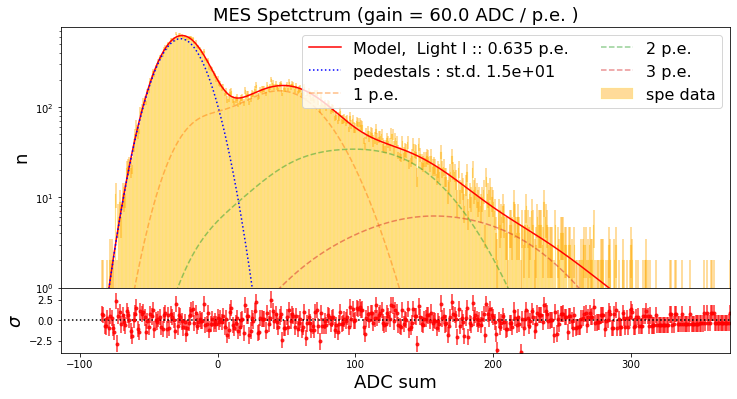

In [9]:
res_data,err,gain_data = fit_ses_2g_2(Q_array1_data,plot=True)

=== Gain ::  58.48302369062853 p.e. ------------- ==== Light I 0.6072568827623906


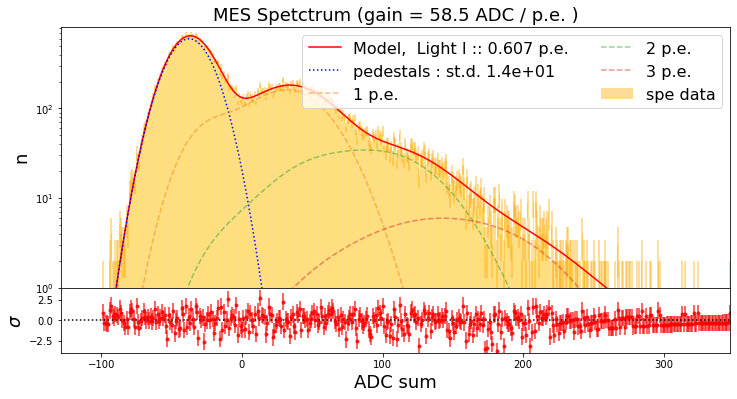

In [10]:
res_data,err,gain_data = fit_ses_2g_2(Q_array1_MC,plot=True)

In [11]:
ress_MC    = np.array(ress_MC)
ress_data  = np.array(ress_data)
gains_MC   = np.array(gains_MC)
gains_data = np.array(gains_data)

sim_gains = np.array(sim_gains)

In [12]:
ress_data.mean(axis=0)

array([6.48387605e-01, 3.99118728e+03, 1.43956703e+01, 4.97252686e-01,
       6.98412689e+01])

Text(0.5, 0, 'ADC sum')

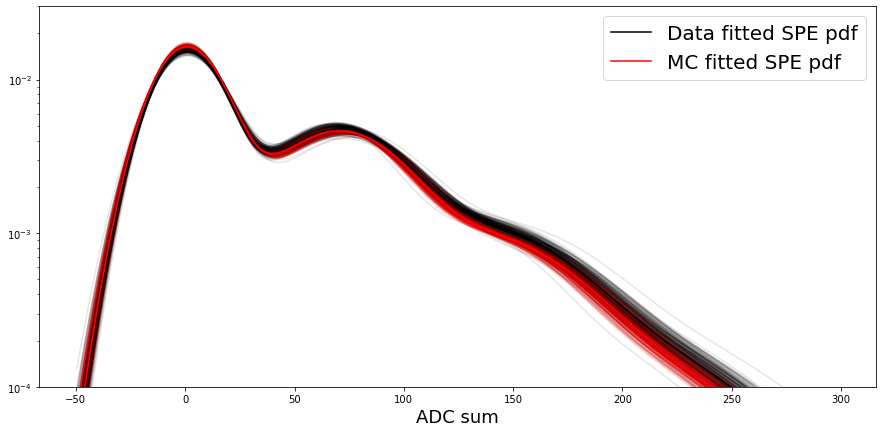

In [13]:
bins = np.arange(-50,300,1)
xx = (bins[1:]+bins[:-1])/2
#h = plt.hist(Q_array1_MC-res_MC[1],  bins=bins,color='red',    alpha=.3, density=1,label='MC')
##h = plt.hist(Q_array1_data-res_data[1],bins=bins,color='black',alpha=.3, density=1,label='data')


for ii in range(len(ress_data)):
    
    p = plt.plot(xx,mes2g(xx,ress_data[ii,0],0,ress_data[ii,2],ress_data[ii,3],ress_data[ii,4]),color='black',alpha=.1)
    p = plt.plot(xx,mes2g(xx,ress_MC[ii,0],0,ress_MC[ii,2],ress_MC[ii,3],ress_MC[ii,4]),color='red',alpha=.1)

p = plt.plot(xx,mes2g(xx,ress_data[:,0].mean(axis=0), \
                          0,ress_data[:,2].mean(axis=0), \
                          ress_data[:,3].mean(axis=0), \
                          ress_data[:,4].mean(axis=0)),color='black',alpha=1,\
                          label='Data fitted SPE pdf')
p = plt.plot(xx,mes2g(xx,ress_MC[:,0].mean(axis=0), \
                          0,ress_MC[:,2].mean(axis=0), \
                          ress_MC[:,3].mean(axis=0), \
                          ress_MC[:,4].mean(axis=0)),color='red',alpha=1,\
                          label='MC fitted SPE pdf')

ax = plt.gca()
ax.set_ylim(1e-4,3e-2)
ax.set_yscale('log')
ax.legend(prop={'size':20})
ax.set_xlabel('ADC sum',fontsize=18)

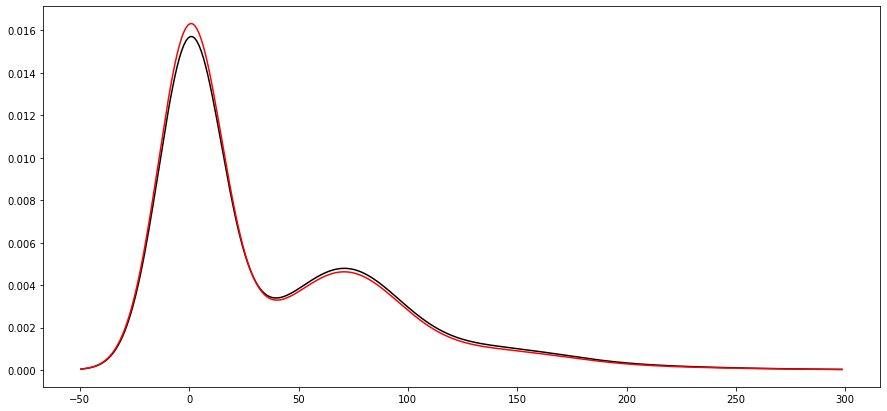

In [14]:
p = plt.plot(xx,mes2g(xx,ress_data[:,0].mean(axis=0), \
                          0,ress_data[:,2].mean(axis=0), \
                          ress_data[:,3].mean(axis=0), \
                          ress_data[:,4].mean(axis=0)),color='black',alpha=1,\
                          label='Data fitted SPE pdf')
p = plt.plot(xx,mes2g(xx,ress_MC[:,0].mean(axis=0), \
                          0,ress_MC[:,2].mean(axis=0), \
                          ress_MC[:,3].mean(axis=0), \
                          ress_MC[:,4].mean(axis=0)),color='red',alpha=1,\
                          label='MC fitted SPE pdf')

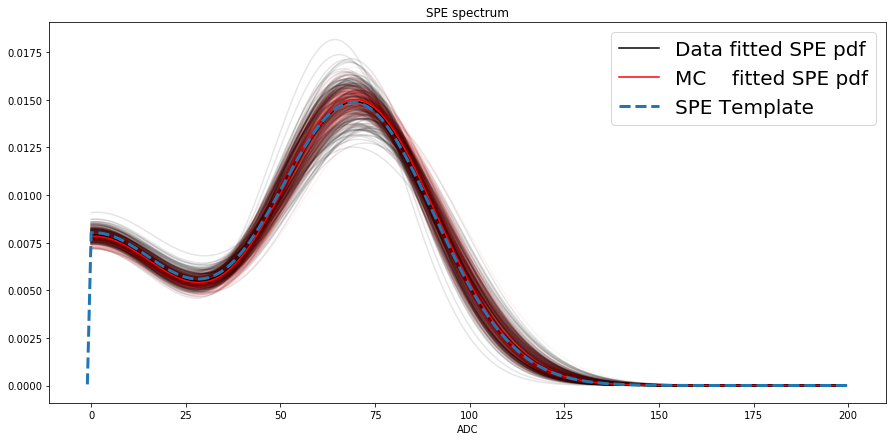

In [15]:

    
#fff ='/local/home/ttaverni/cta-nectar/NectarCamPyUaf/cta/MyNectar/scripts/Nectarpipe_2.0/spe_afterpulse_pdf_NectarCam_14032019.dat'
#from astropy.io import ascii
#aaa = ascii.read(fff)
#plt.plot(aaa['col1'][:300]*58.,aaa['col3'][:300]/58.)

xxx = np.linspace(-1,200,202)
x2 = np.linspace(-1,200,202)

##Fixed param(old)
pp  = 0.45
nn  = 0.715
mu2 = 69.4
res = 0.48
#new
pp  = 0.39
nn  = 0.71
mu2 = 69.4
res = 0.50

xxx = np.arange(0,200,1)
for ii in range(len(ress_data)):
    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[ii,3],ress_data[ii,4],nn),color='black',alpha=.1)
    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[ii,3],ress_MC[ii,4],nn),color='red',alpha=.05)



p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[:,3].mean(axis=0),ress_data[:,4].mean(axis=0),nn),color='black',alpha=1,\
             label='Data fitted SPE pdf')
p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[:,3].mean(axis=0),ress_MC[:,4].mean(axis=0),nn),color='red',alpha=1,\
            label='MC    fitted SPE pdf')

spe = doubleGaussConstrained(x2,pp,res,mu2,nn)
plt.plot(x2,spe,'--',lw=3.,label='SPE Template')
gain = np.sum(x2*doubleGaussConstrained(x2,pp,res,mu2,nn))
plt.gca().set_title('SPE spectrum')
plt.gca().set_xlabel('ADC')
plt.gca().legend(prop={'size': 20})

0.024146665958136852

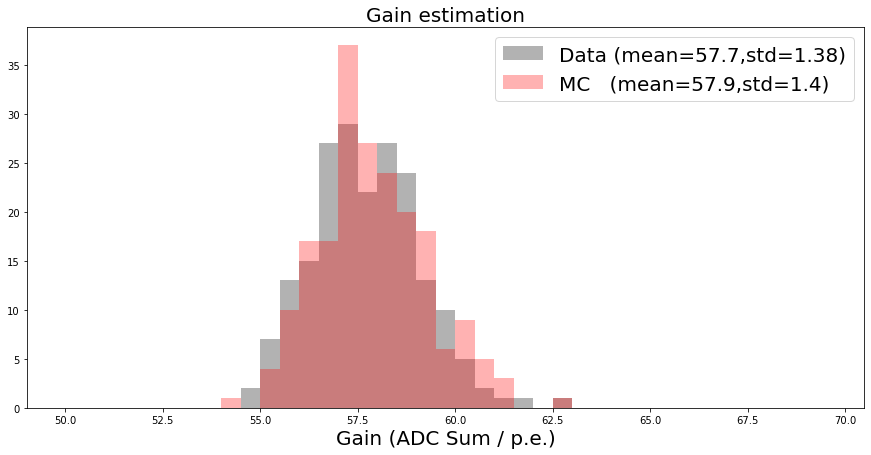

In [16]:
plt.hist(gains_data,bins=np.arange(50,70,.5),color='black',alpha=.3,\
         label='Data (mean={:.3},std={:.3})'.format(gains_data.mean(),gains_data.std()))
plt.hist(gains_MC,bins=np.arange(50,70,.5),color='red',alpha=.3,\
         label='MC   (mean={:.3},std={:.3})'.format(gains_MC.mean(),gains_MC.std()))
plt.gca().legend(prop={'size':20})

plt.gca().set_title('Gain estimation',fontsize=20)

plt.gca().set_xlabel('Gain (ADC Sum / p.e.)',fontsize=20)
gains_MC.std()/gains_MC.mean()

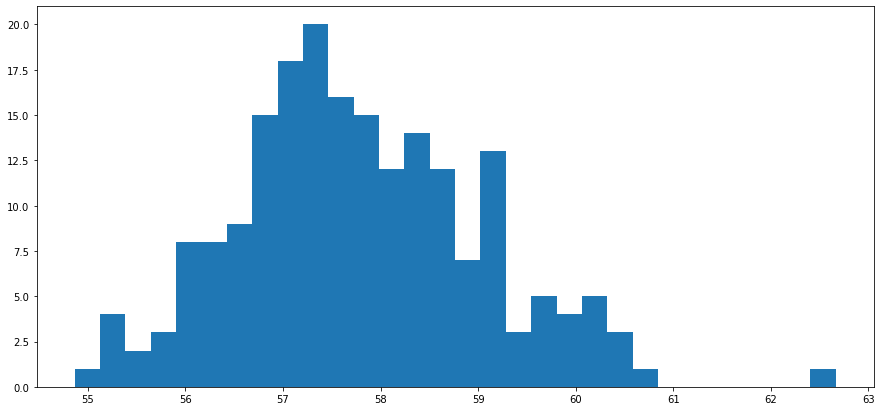

In [44]:
h = plt.hist(sim_gains,30)

0.024146665958136852

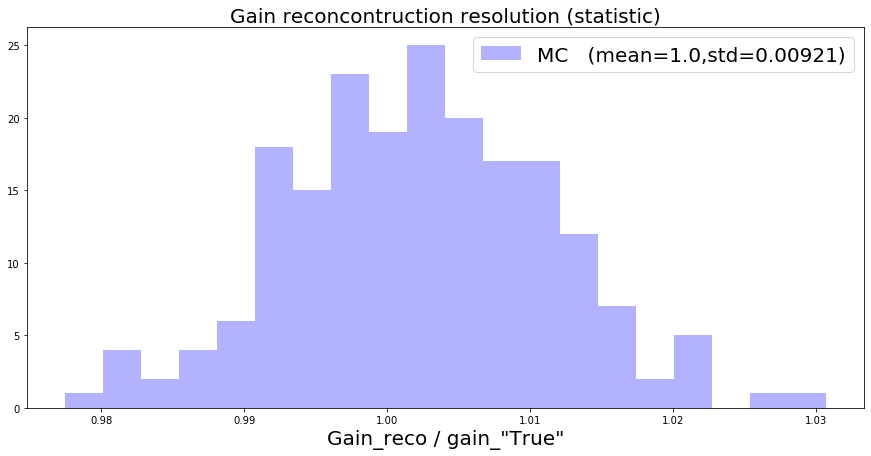

In [18]:
plt.hist(gains_MC/sim_gains,20,color='blue',alpha=.3,\
         label='MC   (mean={:.3},std={:.3})'.format(np.mean(gains_MC/sim_gains),np.std(gains_MC/sim_gains)))
plt.gca().legend(prop={'size':20})

plt.gca().set_title('Gain reconcontruction resolution (statistic)',fontsize=20)

plt.gca().set_xlabel('Gain_reco / gain_"True"',fontsize=20)
gains_MC.std()/gains_MC.mean()


0.021047466

In [20]:
58.*dc_to_pe.mean()

1.113897792994976

In [21]:
(gains_MC/sim_gains).mean()

1.0023242455432726

In [22]:
(gains_MC/sim_gains).std()

0.009214912218173969

In [23]:
(gains_data/gains_data.mean()).std()

0.023985197731318138

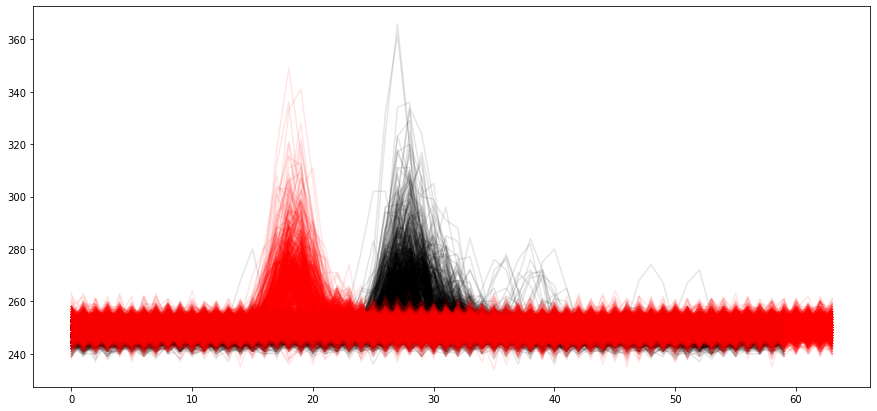

In [24]:
p = plt.plot(wfs_data[:2000,1,:].T,color = 'black',alpha=.1)
p = plt.plot(wfs_MC[:2000,1,:].T,color = 'red',alpha=.1)

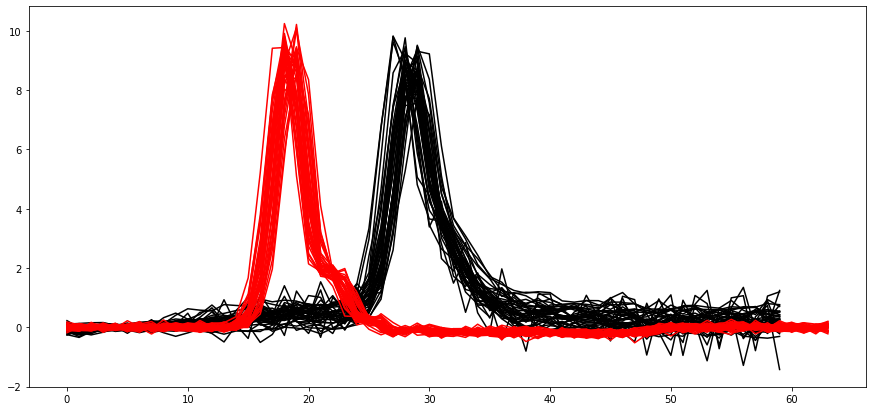

In [25]:
p = plt.plot(wfs_data[:2000,:,:].mean(axis=0).T-wfs_data[:2000,:,:10].mean(axis=(0,2)),color = 'black',alpha=1)
p = plt.plot(wfs_MC[:2000,:,:].mean(axis=0).T-wfs_MC[:2000,:,:10].mean(axis=(0,2)),color = 'red',alpha=1)

Text(0.5, 0, 'Light intensity (p.e.)')

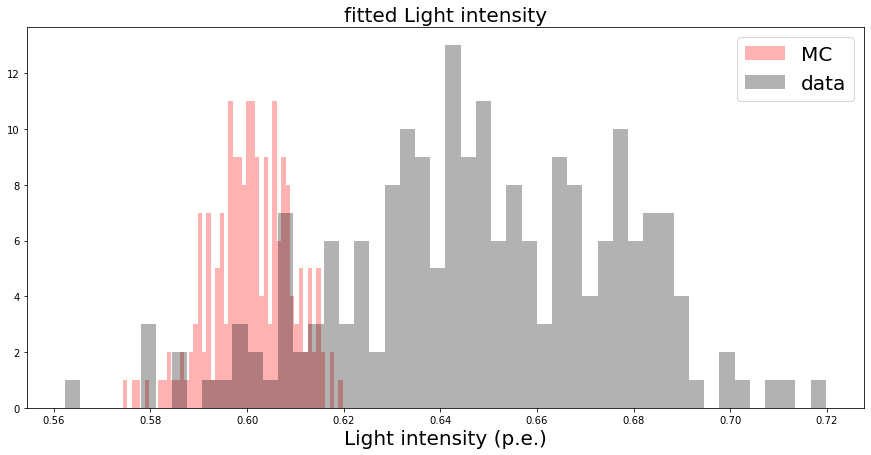

In [26]:
plt.hist(ress_MC.T[0],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[0],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted Light intensity',fontsize=20)
plt.gca().set_xlabel('Light intensity (p.e.)',fontsize=20)

Text(0.5, 0, 'ADC')

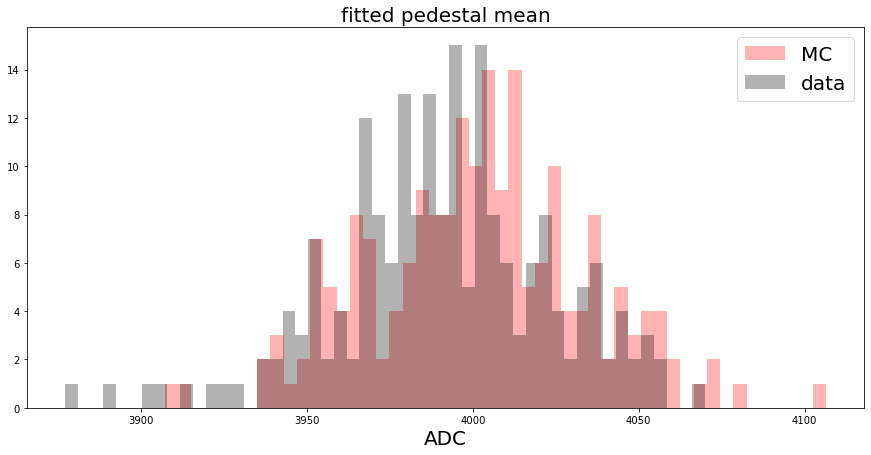

In [27]:
plt.hist(ress_MC.T[1],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[1],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted pedestal mean',fontsize=20)
plt.gca().set_xlabel('ADC',fontsize=20)

Text(0.5, 0, 'ADC')

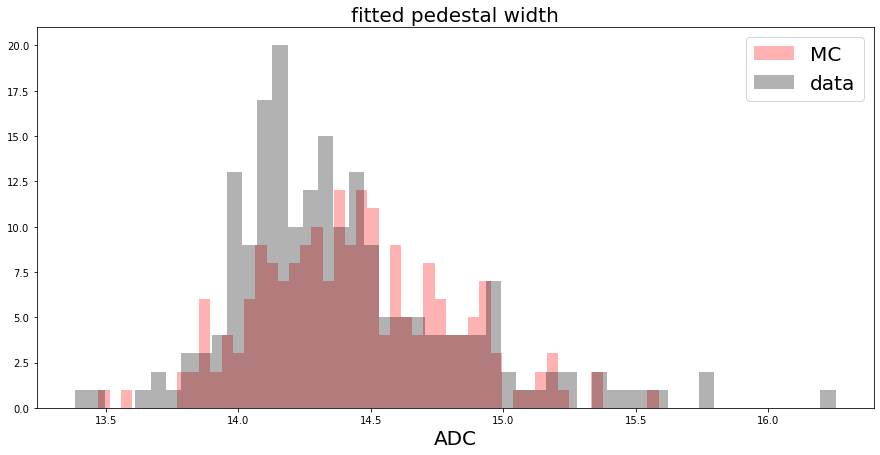

In [28]:
plt.hist(ress_MC.T[2],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[2],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted pedestal width',fontsize=20)
plt.gca().set_xlabel('ADC',fontsize=20)

Text(0.5, 0, 'ADC')

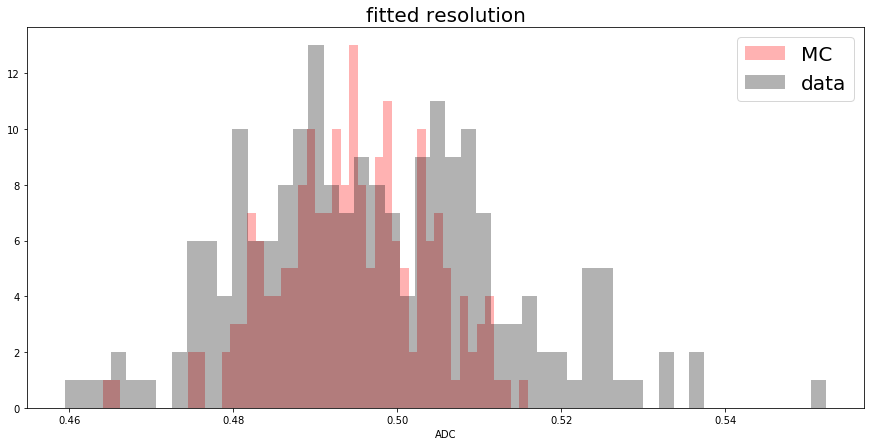

In [29]:
plt.hist(ress_MC.T[3],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[3],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted resolution',fontsize=20)
plt.gca().set_xlabel('ADC')

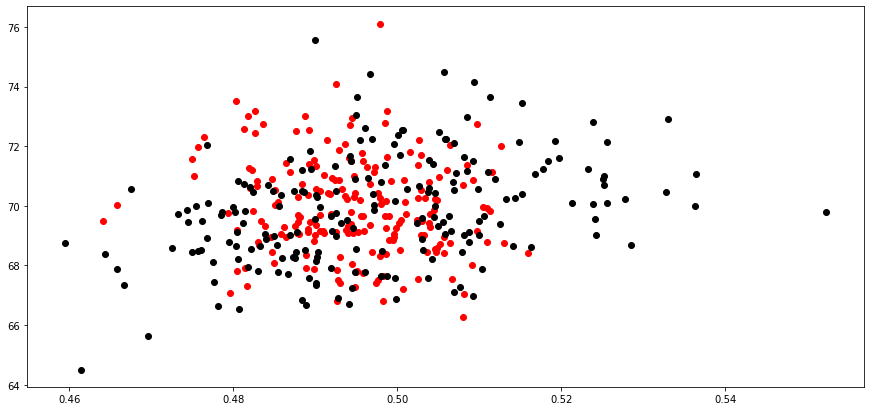

In [30]:
plt.plot(ress_MC.T[3],ress_MC.T[4],'o',color='red')
plt.plot(ress_data.T[3],ress_data.T[4],'o',color='black')

Text(0.5, 0, 'ADC')

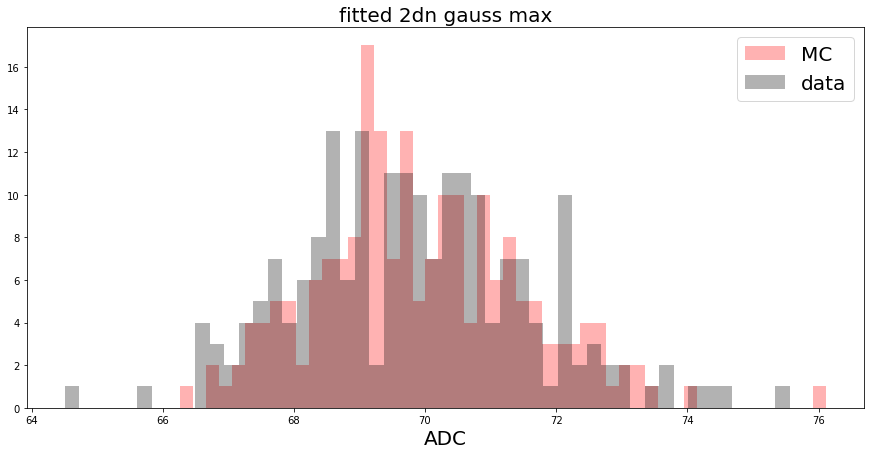

In [31]:
plt.hist(ress_MC.T[4],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[4],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted 2dn gauss max',fontsize=20)
plt.gca().set_xlabel('ADC',fontsize=20)

Text(0.5, 0, 'ADC')

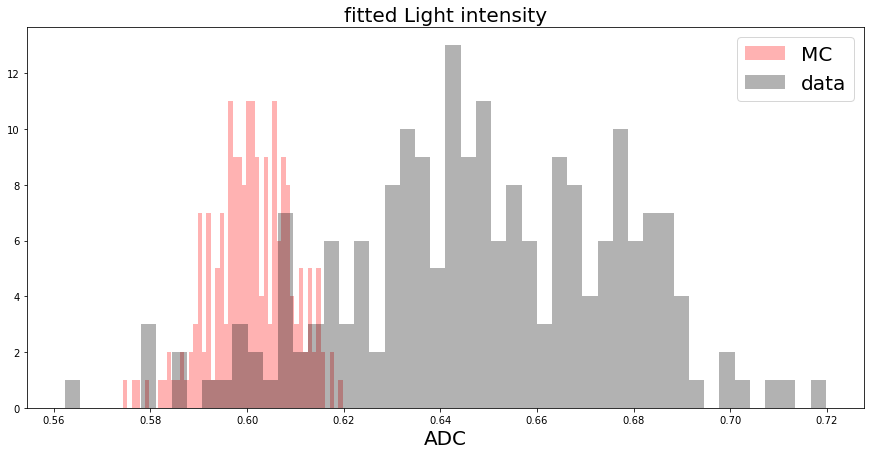

In [32]:
plt.hist(ress_MC.T[0],50,color = 'red' ,alpha =.3,label='MC')
plt.hist(ress_data.T[0],50,color = 'black' ,alpha =.3,label='data')
plt.legend(prop={'size':20})
plt.gca().set_title('fitted Light intensity',fontsize=20)
plt.gca().set_xlabel('ADC',fontsize=20)

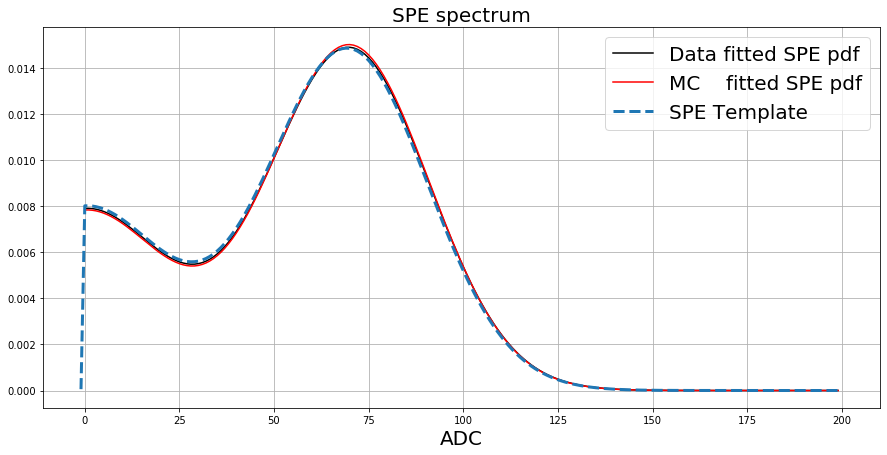

In [33]:

    
#fff ='/local/home/ttaverni/cta-nectar/NectarCamPyUaf/cta/MyNectar/scripts/Nectarpipe_2.0/spe_afterpulse_pdf_NectarCam_14032019.dat'
#from astropy.io import ascii
#aaa = ascii.read(fff)
#plt.plot(aaa['col1'][:300]*58.,aaa['col3'][:300]/58.)

xxx = np.linspace(-1,200,202)
x2 = np.linspace(-1,200,202)

##Fixed param
pp  = 0.45
nn  = 0.715
mu2 = 69.4
res = 0.48

#new
pp  = 0.39
nn  = 0.71
mu2 = 69.4
res = 0.50


xxx = np.arange(0,200,1)
#for ii in range(len(ress_data)):
#    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[ii,3],ress_data[ii,4],nn),color='black',alpha=.1)
#    p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[ii,3],ress_MC[ii,4],nn),color='red',alpha=.05)



p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_data[:,3].mean(axis=0),ress_data[:,4].mean(axis=0),nn),color='black',alpha=1,\
             label='Data fitted SPE pdf')
p = plt.plot(xxx,doubleGaussConstrained(xxx,pp,ress_MC[:,3].mean(axis=0),ress_MC[:,4].mean(axis=0),nn),color='red',alpha=1,\
            label='MC    fitted SPE pdf')

spe = doubleGaussConstrained(x2,pp,res,mu2,nn)

plt.plot(x2,spe,'--',lw=3.,label='SPE Template')
gain = np.sum(x2*doubleGaussConstrained(x2,pp,res,mu2,nn))
plt.gca().set_title('SPE spectrum',fontsize=20.)
plt.gca().set_xlabel('ADC',fontsize=20.)
plt.gca().legend(prop={'size': 20})
plt.gca().grid()

In [34]:
ress_data[:,:].mean(axis=0)

array([6.48387605e-01, 3.99118728e+03, 1.43956703e+01, 4.97252686e-01,
       6.98412689e+01])

In [35]:
ress_MC[:,:].mean(axis=0)

array([6.00695591e-01, 4.00160679e+03, 1.44377478e+01, 4.94458219e-01,
       6.99327096e+01])

In [36]:
dc_to_pe

array([0.01923317, 0.02014914, 0.0193131 , 0.01961967, 0.01936457,
       0.01927437, 0.01944749, 0.01933911, 0.01924228, 0.01927713,
       0.01915301, 0.01933057, 0.01846613, 0.01964016, 0.01862195,
       0.01882508, 0.01892423, 0.01901213, 0.01860279, 0.0197899 ,
       0.01926997, 0.01915757, 0.02014331, 0.01927323, 0.01945222,
       0.01847398, 0.01946015, 0.0190615 , 0.0185459 , 0.01885743,
       0.01908133, 0.01966277, 0.01878261, 0.01941897, 0.01890171,
       0.01858426, 0.01949096, 0.01943602, 0.0194764 , 0.01904916],
      dtype=float32)